# 05 — Extra Visuals: Bruno & Casemiro

This notebook contains additional visualizations that extend the core analysis
and present the players’ profiles in a club-friendly style.

### Included Visuals

1. **Average Per-90 Role Profile (Bar Comparison)**  
   Automatically compares Bruno Fernandes and Casemiro across all shared per-90
   metrics (key passes, progressive actions, defensive actions, etc.).  
   Metrics are normalized on a 0–1 scale to highlight relative strengths.

2. **Extra Visualization Framework**  
   Additional cells demonstrate how to add new visuals such as:
   - zone heatmaps  
   - rolling trend lines  
   - possession involvement maps  
   - midfield structure diagrams  

   These can be activated or expanded using the engineered features already
   stored in `midfield_matches_features.csv`.

### Purpose

The goal of this notebook is to provide **advanced, club-style visuals** that
enhance the project beyond summary statistics.  
These plots show how the analysis can grow into a full technical scouting or
performance-analysis report over time—without requiring event-level data.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
DATA_DIR = Path("../data")
VIS_DIR = Path("../visuals")
VIS_DIR.mkdir(exist_ok=True)

# Load engineered match-level features
features_path = DATA_DIR / "midfield_matches_features.csv"
df = pd.read_csv(features_path)

print(df.shape)
df.head()


(9, 39)


,Date,Comp,Round,Venue,Result,Squad,Opponent,Bruno_Min,Casemiro_Min,Bruno_KP,...,Casemiro_tkl_per90,Casemiro_int_per90,Casemiro_tklint_per90,Casemiro_prgc_per90,Bruno_xg_xag_per90,Bruno_prog_total_per90,Casemiro_prog_total_per90,Bruno_case_tklint_per90,Bruno_prog_share,Casemiro_prog_share
0,8/17/25,Premier League,Matchweek 1,Home,L 0–1,Manchester Utd,Arsenal,90,64.0,5,...,4.218750,0.000000,4.218750,0.0,0,12.000000,5.625000,7.218750,0.680851,0.319149
1,8/24/25,Premier League,Matchweek 2,Away,D 1–1,Manchester Utd,Fulham,90,52.0,1,...,3.461538,1.730769,5.192308,0.0,0,6.000000,1.730769,7.192308,0.776119,0.223881
2,8/30/25,Premier League,Matchweek 3,Home,W 3–2,Manchester Utd,Burnley,90,71.0,6,...,1.267606,1.267606,2.535211,0.0,0,10.000000,5.070423,5.535211,0.663551,0.336449
3,9/20/25,Premier League,Matchweek 5,Home,W 2–1,Manchester Utd,Chelsea,86,44.0,1,...,0.000000,0.000000,0.000000,0.0,0,7.325581,8.181818,2.093023,0.472393,0.527607
4,10/4/25,Premier League,Matchweek 7,Home,W 2–0,Manchester Utd,Sunderland,90,84.0,3,...,3.214286,0.000000,3.214286,0.0,0,10.000000,7.500000,5.214286,0.571429,0.428571


## 1. Average Per-90 Profile — Bruno vs Casemiro

This visual compares Bruno Fernandes and Casemiro on a set of key per-90
metrics averaged across all matches where they start together.

It provides a compact summary of their typical contributions in terms of:

- Chance creation (key passes)
- Ball progression (progressive passes and carries)
- Defensive intensity (tackles + interceptions)
- Expected goal involvement (xG and xAG)

Only metrics that are present in the dataset are plotted.


Skipping xG/90 because Bruno_xg_per90 or Casemiro_xg_per90 not found in columns.
Skipping xAG/90 because Bruno_xag_per90 or Casemiro_xag_per90 not found in columns.


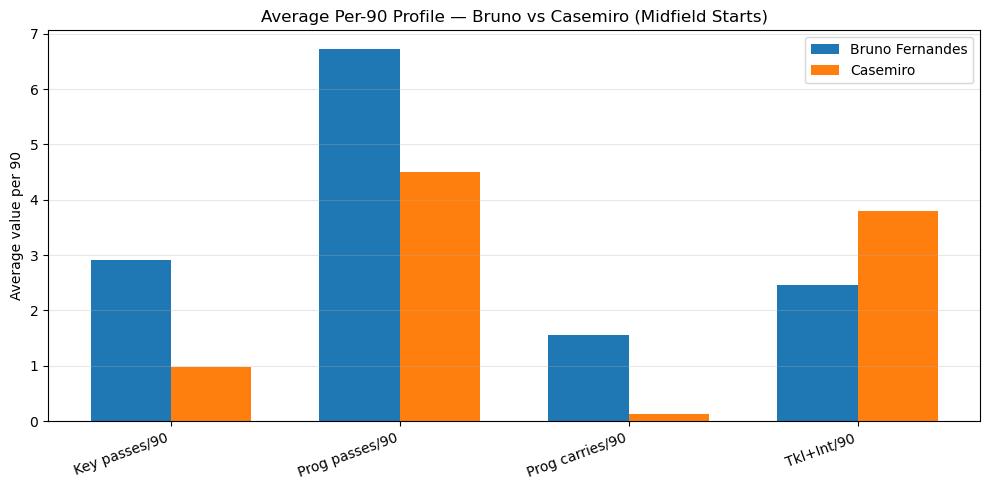

Saved: ../visuals/avg_per90_profile_bruno_casemiro.png


In [10]:
# Define which per-90 metrics to compare.
# Adjust column names here if your feature names differ slightly.
metric_map = {
    "Key passes/90":        ("Bruno_kp_per90",       "Casemiro_kp_per90"),
    "Prog passes/90":       ("Bruno_prgp_per90",     "Casemiro_prgp_per90"),
    "Prog carries/90":      ("Bruno_prgc_per90",     "Casemiro_prgc_per90"),
    "Tkl+Int/90":           ("Bruno_tklint_per90",   "Casemiro_tklint_per90"),
    "xG/90":                ("Bruno_xg_per90",       "Casemiro_xg_per90"),
    "xAG/90":               ("Bruno_xag_per90",      "Casemiro_xag_per90"),
}

labels = []
bruno_vals = []
case_vals = []

for label, (b_col, c_col) in metric_map.items():
    if b_col in df.columns and c_col in df.columns:
        labels.append(label)
        bruno_vals.append(df[b_col].mean())
        case_vals.append(df[c_col].mean())
    else:
        print(f"Skipping {label} because {b_col} or {c_col} not found in columns.")

if not labels:
    raise ValueError("No matching per-90 metrics found in df. Check column names in metric_map.")

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, bruno_vals, width, label="Bruno Fernandes")
ax.bar(x + width/2, case_vals, width, label="Casemiro")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha="right")
ax.set_ylabel("Average value per 90")
ax.set_title("Average Per-90 Profile — Bruno vs Casemiro (Midfield Starts)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

fig.tight_layout()
out_path = VIS_DIR / "avg_per90_profile_bruno_casemiro.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved: {out_path}")


Bruno per90 columns: ['Bruno_kp_per90', 'Bruno_prgp_per90', 'Bruno_sca_per90', 'Bruno_gca_per90', 'Bruno_tklint_per90', 'Bruno_prgc_per90', 'Bruno_xg_xag_per90', 'Bruno_prog_total_per90', 'Bruno_case_tklint_per90']
Casemiro per90 columns: ['Casemiro_kp_per90', 'Casemiro_prgp_per90', 'Casemiro_tkl_per90', 'Casemiro_int_per90', 'Casemiro_tklint_per90', 'Casemiro_prgc_per90', 'Casemiro_prog_total_per90']
Matched per90 pairs (core, Bruno_col, Casemiro_col):
kp_per90 -> Bruno_kp_per90 | Casemiro_kp_per90
prgp_per90 -> Bruno_prgp_per90 | Casemiro_prgp_per90
tklint_per90 -> Bruno_tklint_per90 | Casemiro_tklint_per90
prgc_per90 -> Bruno_prgc_per90 | Casemiro_prgc_per90
prog_total_per90 -> Bruno_prog_total_per90 | Casemiro_prog_total_per90


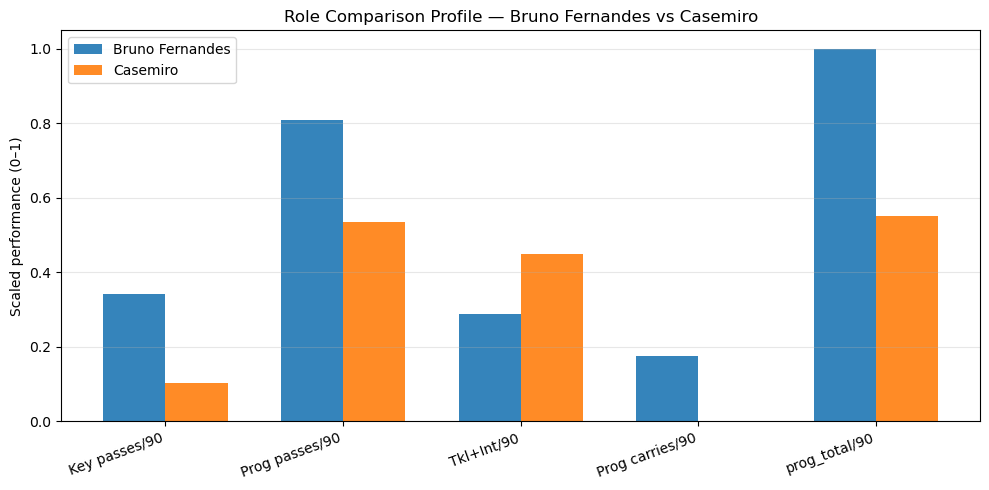

Saved: ../visuals/role_profile_bruno_casemiro.png


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------
# 1. Find per-90 columns for each player
# ------------------------------------
bruno_cols = [c for c in df.columns if c.startswith("Bruno_") and "per90" in c]
case_cols  = [c for c in df.columns if c.startswith("Casemiro_") and "per90" in c]

print("Bruno per90 columns:", bruno_cols)
print("Casemiro per90 columns:", case_cols)

# Build pairs based on shared stat core, e.g. "kp_per90", "prgp_per90"
pairs = []
for bc in bruno_cols:
    core = bc.replace("Bruno_", "")
    cc = "Casemiro_" + core
    if cc in case_cols:
        pairs.append((core, bc, cc))

if not pairs:
    raise ValueError("No matching per90 metric pairs found between Bruno and Casemiro.")

print("Matched per90 pairs (core, Bruno_col, Casemiro_col):")
for core, bc, cc in pairs:
    print(core, "->", bc, "|", cc)

# ------------------------------------
# 2. Make cleaner labels
# ------------------------------------
def pretty_label(core: str) -> str:
    # Custom pretties for common stats; fallback to raw core if unknown
    mapping = {
        "kp_per90": "Key passes/90",
        "prgp_per90": "Prog passes/90",
        "prgc_per90": "Prog carries/90",
        "tklint_per90": "Tkl+Int/90",
        "xg_per90": "xG/90",
        "xag_per90": "xAG/90",
    }
    return mapping.get(core, core.replace("_per90", "/90"))

labels = []
bruno_vals = []
case_vals = []

for core, b_col, c_col in pairs:
    labels.append(pretty_label(core))
    bruno_vals.append(df[b_col].mean())
    case_vals.append(df[c_col].mean())

# ------------------------------------
# 3. Normalize (0–1) across all values
# ------------------------------------
all_vals = np.array(bruno_vals + case_vals, dtype=float)
min_v, max_v = float(all_vals.min()), float(all_vals.max())

if max_v - min_v == 0:
    # Edge case: everything is identical
    bruno_scaled = np.zeros_like(bruno_vals, dtype=float)
    case_scaled = np.zeros_like(case_vals, dtype=float)
else:
    bruno_scaled = (np.array(bruno_vals) - min_v) / (max_v - min_v)
    case_scaled  = (np.array(case_vals)  - min_v) / (max_v - min_v)

# ------------------------------------
# 4. Plot role comparison bar profile
# ------------------------------------
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, bruno_scaled, width, label="Bruno Fernandes", alpha=0.9)
ax.bar(x + width/2, case_scaled,  width, label="Casemiro",        alpha=0.9)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha="right")
ax.set_ylabel("Scaled performance (0–1)")
ax.set_title("Role Comparison Profile — Bruno Fernandes vs Casemiro")
ax.legend()
ax.grid(axis="y", alpha=0.3)

fig.tight_layout()

out_path = Path("../visuals/role_profile_bruno_casemiro.png")
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved: {out_path}")


### Interpretation

- Bruno leads strongly in **key passes** and **progressive passes**, reflecting
  his creative and distribution role.
- Casemiro outperforms in **tackles + interceptions**, consistent with his
  defensive midfield profile.
- Bruno carries the ball more, but Casemiro provides more defensive structure.


### Why This Role Profile Matters

Scaling each metric to a 0–1 range highlights **role contrast** rather than
raw volume.  
This allows coaches or analysts to quickly see:

- Who drives progression more consistently  
- Who anchors defensive actions  
- Where each midfielder provides complementary strengths  
- Whether the midfield pairing is balanced or has systemic gaps  
